# Dota 2 results prediction

Results prediction of Dota 2 games. Data from https://archive.ics.uci.edu/ml/datasets/Dota2+Games+Results

Information about the data from UCI Machine Learning repository page:
Attribute Information:
Each row of the dataset is a single game with the following features (in the order in the vector):
1. Team won the game (1 or -1)
2. Cluster ID (related to location)
3. Game mode (eg All Pick)
4. Game type (eg. Ranked)
5 - end: Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.

## EDA

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

train = pd.read_csv('dota2Train.csv', header = None)
test = pd.read_csv('dota2Test.csv', header = None)

train = train.add_prefix('col')
test = test.add_prefix('col')
train = train.rename(columns={'col0': 'label'})
test = test.rename(columns={'col0': 'label'})
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92650 entries, 0 to 92649
Columns: 117 entries, label to col116
dtypes: int64(117)
memory usage: 82.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10294 entries, 0 to 10293
Columns: 117 entries, label to col116
dtypes: int64(117)
memory usage: 9.2 MB


In [149]:
train.head()
test.head()

,label,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
print(train.col1.unique())
print(train.col2.unique())
print(train.col3.unique())

[223 152 131 154 171 122 224 227 111 151 145 231 188 156 144 153 225 155
 186 181 183 121 187 232 185 192 136 123 132 182 161 191 138 137 134 184
 112 133 212 204 124 261 213 135 211 241 251]
[2 8 6 9 1 3 4 7 5]
[2 3 1]


Columns col1, col2 and col3 represents respectively cluster ID, game mode and game type, so they should be transformed to categorical. 

Columns from col4 to col116 represent different types of heroes and the value indicates if a team chose that hero and which team did it (0 for not chosen, 1 for team 1 and -1 for team -1). If necessary, it can be separated between team 1 and team -1, but I'll leave it like this for now.

Next I'll use get_dummies method for encoding col1, col2, col3

In [151]:
cat_col = ['col1', 'col2', 'col3']
data = pd.concat([train, test])
for col in cat_col:
    ohe = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, ohe], axis=1)
data.drop(cat_col, axis=1, inplace=True)
train = data.iloc[:train.shape[0],:]
test = data.iloc[train.shape[0]:,:]

In [152]:
print(train.head())
print(test.head())

   label  col4  col5  col6  col7  col8  col9  col10  col11  col12  ...  \
0     -1     0     0     0     0     0     0      0      0      0  ...   
1      1     0     0     0     1     0    -1      0      0      0  ...   
2      1     0     0     0     1     0    -1      0      0      0  ...   
3      1     0     0     0     0     0     0     -1      0      0  ...   
4     -1     0     0     0     0     0    -1      0      0     -1  ...   

   col2_3  col2_4  col2_5  col2_6  col2_7  col2_8  col2_9  col3_1  col3_2  \
0       0       0       0       0       0       0       0       0       1   
1       0       0       0       0       0       0       0       0       1   
2       0       0       0       0       0       0       0       0       1   
3       0       0       0       0       0       0       0       0       1   
4       0       0       0       0       0       0       0       0       0   

   col3_3  
0       0  
1       0  
2       0  
3       0  
4       1  

[5 rows x 173 colum

Now that the categorical data has been encoded, I'll try separate the labels from the data and compare a few simple classification models.

In [153]:
y_train = train.label
y_test = test.label
X_train = train.drop(['label'], axis=1)
X_test = test.drop(['label'], axis=1)

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost

In [ ]:
models = []

#for m in models:
#    cv_results = cross_val_score(m, X_train, y_train, cv=8)
#    result1 = np.mean(cv_results) - np.std(cv_results)
#    result2 = np.mean(cv_results) + np.std(cv_results)
#    print('modelo %s : %s  -  %s'%(type(m).__name__,result1, result2))
#   

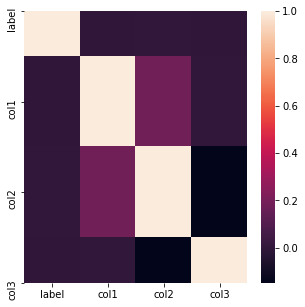

In [119]:
#plt.figure(figsize=(5,5))
#sns.heatmap(train[['label','col1', 'col2', 'col3']].corr())
#plt.show()